# Table of Contents:
1. [Introduction](#section-one)

2. [Reviews Preprocessing and Cleaning](#section-two)

3. [Story Generation and Visualization from reviews](#section-three)

4. [Extracting Features from Cleaned reviews](#section-four)

5. [Model Building: Sentiment Analysis](#section-five)

# Introduction
**Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of
    product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' 
    where customers who have already got that product leave a rating after using them and brief their experience by giving
    reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to 
    sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. 
    In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) 
    technology.**

## Acknowledgements:
1. [Ngram visualization analysis]
2. [ROC AUC curve]
3. [Polarity and orange plots]



## What is sentiment analysis?
**Sentiment Analysis is the most common text classification tool that analyses an incoming message and 
    tells whether the underlying sentiment is positive, negative our neutral.Understanding people’s emotions is 
    essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.
    It is quite hard for a human to go through each single line and identify the emotion being the user experience.
    Now with technology, we can automatically analyzing customer feedback, from survey responses to social media 
    conversations, brands are able to listen attentively to their customers, and tailor products and services to meet 
    their needs.**

## Problem statement
**This is the Problem Statement given by ISRO to classify the customer comments. This would be helpful for 
    the organization to understand Customer feedbacks.**

**Webportals like Bhuvan get vast amount of feedback from the users. To go through all the feedback's can be a
    tedious job. You have to categorize opinions expressed in feedback forums. This can be utilized for feedback
    management system. We Classification of individual comments/reviews.and we also determining overall rating based
    on individual comments/reviews. So that company can get a complete idea on feedback's provided by customers and can
    take care on those particular fields. This makes more loyal Customers to the company, increase in business , fame ,
    brand value ,profits.**

## Objectives of Project

1. Reviews Preprocessing and Cleaning
2. Story Generation and Visualization from reviews
3. Extracting Features from Cleaned reviews
4. Model Building: Sentiment Analysis


## Import Libraries
**Let's import all necessary libraries for the analysis and along with it let's bring down our dataset**


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

import numpy as np

import seaborn as sns

from sklearn import metrics

from nltk import classify

from nltk import NaiveBayesClassifier

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score

import math
import warnings

warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)

sns.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

Reading The Data

In [2]:
df = pd.read_csv(r"C:\Users\shita\Downloads\train_data.csv")
df.head(5)

Name of the product Product Brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z   
4                  Electronics  2017-01-23T00:00:00.000Z   

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title sentiment  
0           Powerful tablet  Positive  
1  Amazon Echo Plus AWESOME  Positive  
2                   Average   Neutral  
3               Greattttttt  Positive  
4             Very durable!  Positive

**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [4]:
df.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment'],
      dtype='object')

In [5]:
df.describe()

Name of the product Product Brand  \
count                                                4000          4000   
unique                                                 23             1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
freq                                                  676          4000   

                                               categories primaryCategories  \
count                                                4000              4000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  628              2600   

                    reviews.date  \
count                       4000   
unique                       638   
top     2017-01-23T00:00:00.000Z   
freq                          99   

                                             reviews.text reviews.title  \
count                                                4000          3990   
unique                                               3598          2606   
top     I bought this kindle for my 11yr old granddaug...  Great tablet   
freq                                                    4           100   

       sentiment  
count       4000  
unique         3  
top     Positive  
freq        3749

Finding Null Values

In [6]:
df.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64

In [7]:
df.dtypes

Name of the product    object
Product Brand          object
categories             object
primaryCategories      object
reviews.date           object
reviews.text           object
reviews.title          object
sentiment              object
dtype: object

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [9]:
print(f'\t Data shape: {df.shape}\n')


	 Data shape: (4000, 8)



In [10]:
# how many missing values exist or better still what is the % of missing values in the dataset?

def percent_missing(df, data_type):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(f"The {data_type} dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df, 'data')


The data dataset contains 0.03 % missing values.


In [11]:
df['reviews.title']=df['reviews.title'].fillna('Missing')

In [12]:
df.isnull().sum()

Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64

Getting only Unique products

In [13]:
amazon_unique = len(df["categories"].unique())

print(f"Number of primaryCategories : {amazon_unique}")

Number of primaryCategories : 23


In [14]:
#Figuring out the distribution of categories

df['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

## Wordcloud-Positive reviews

**Let's look at the word cloud of positive reviews**

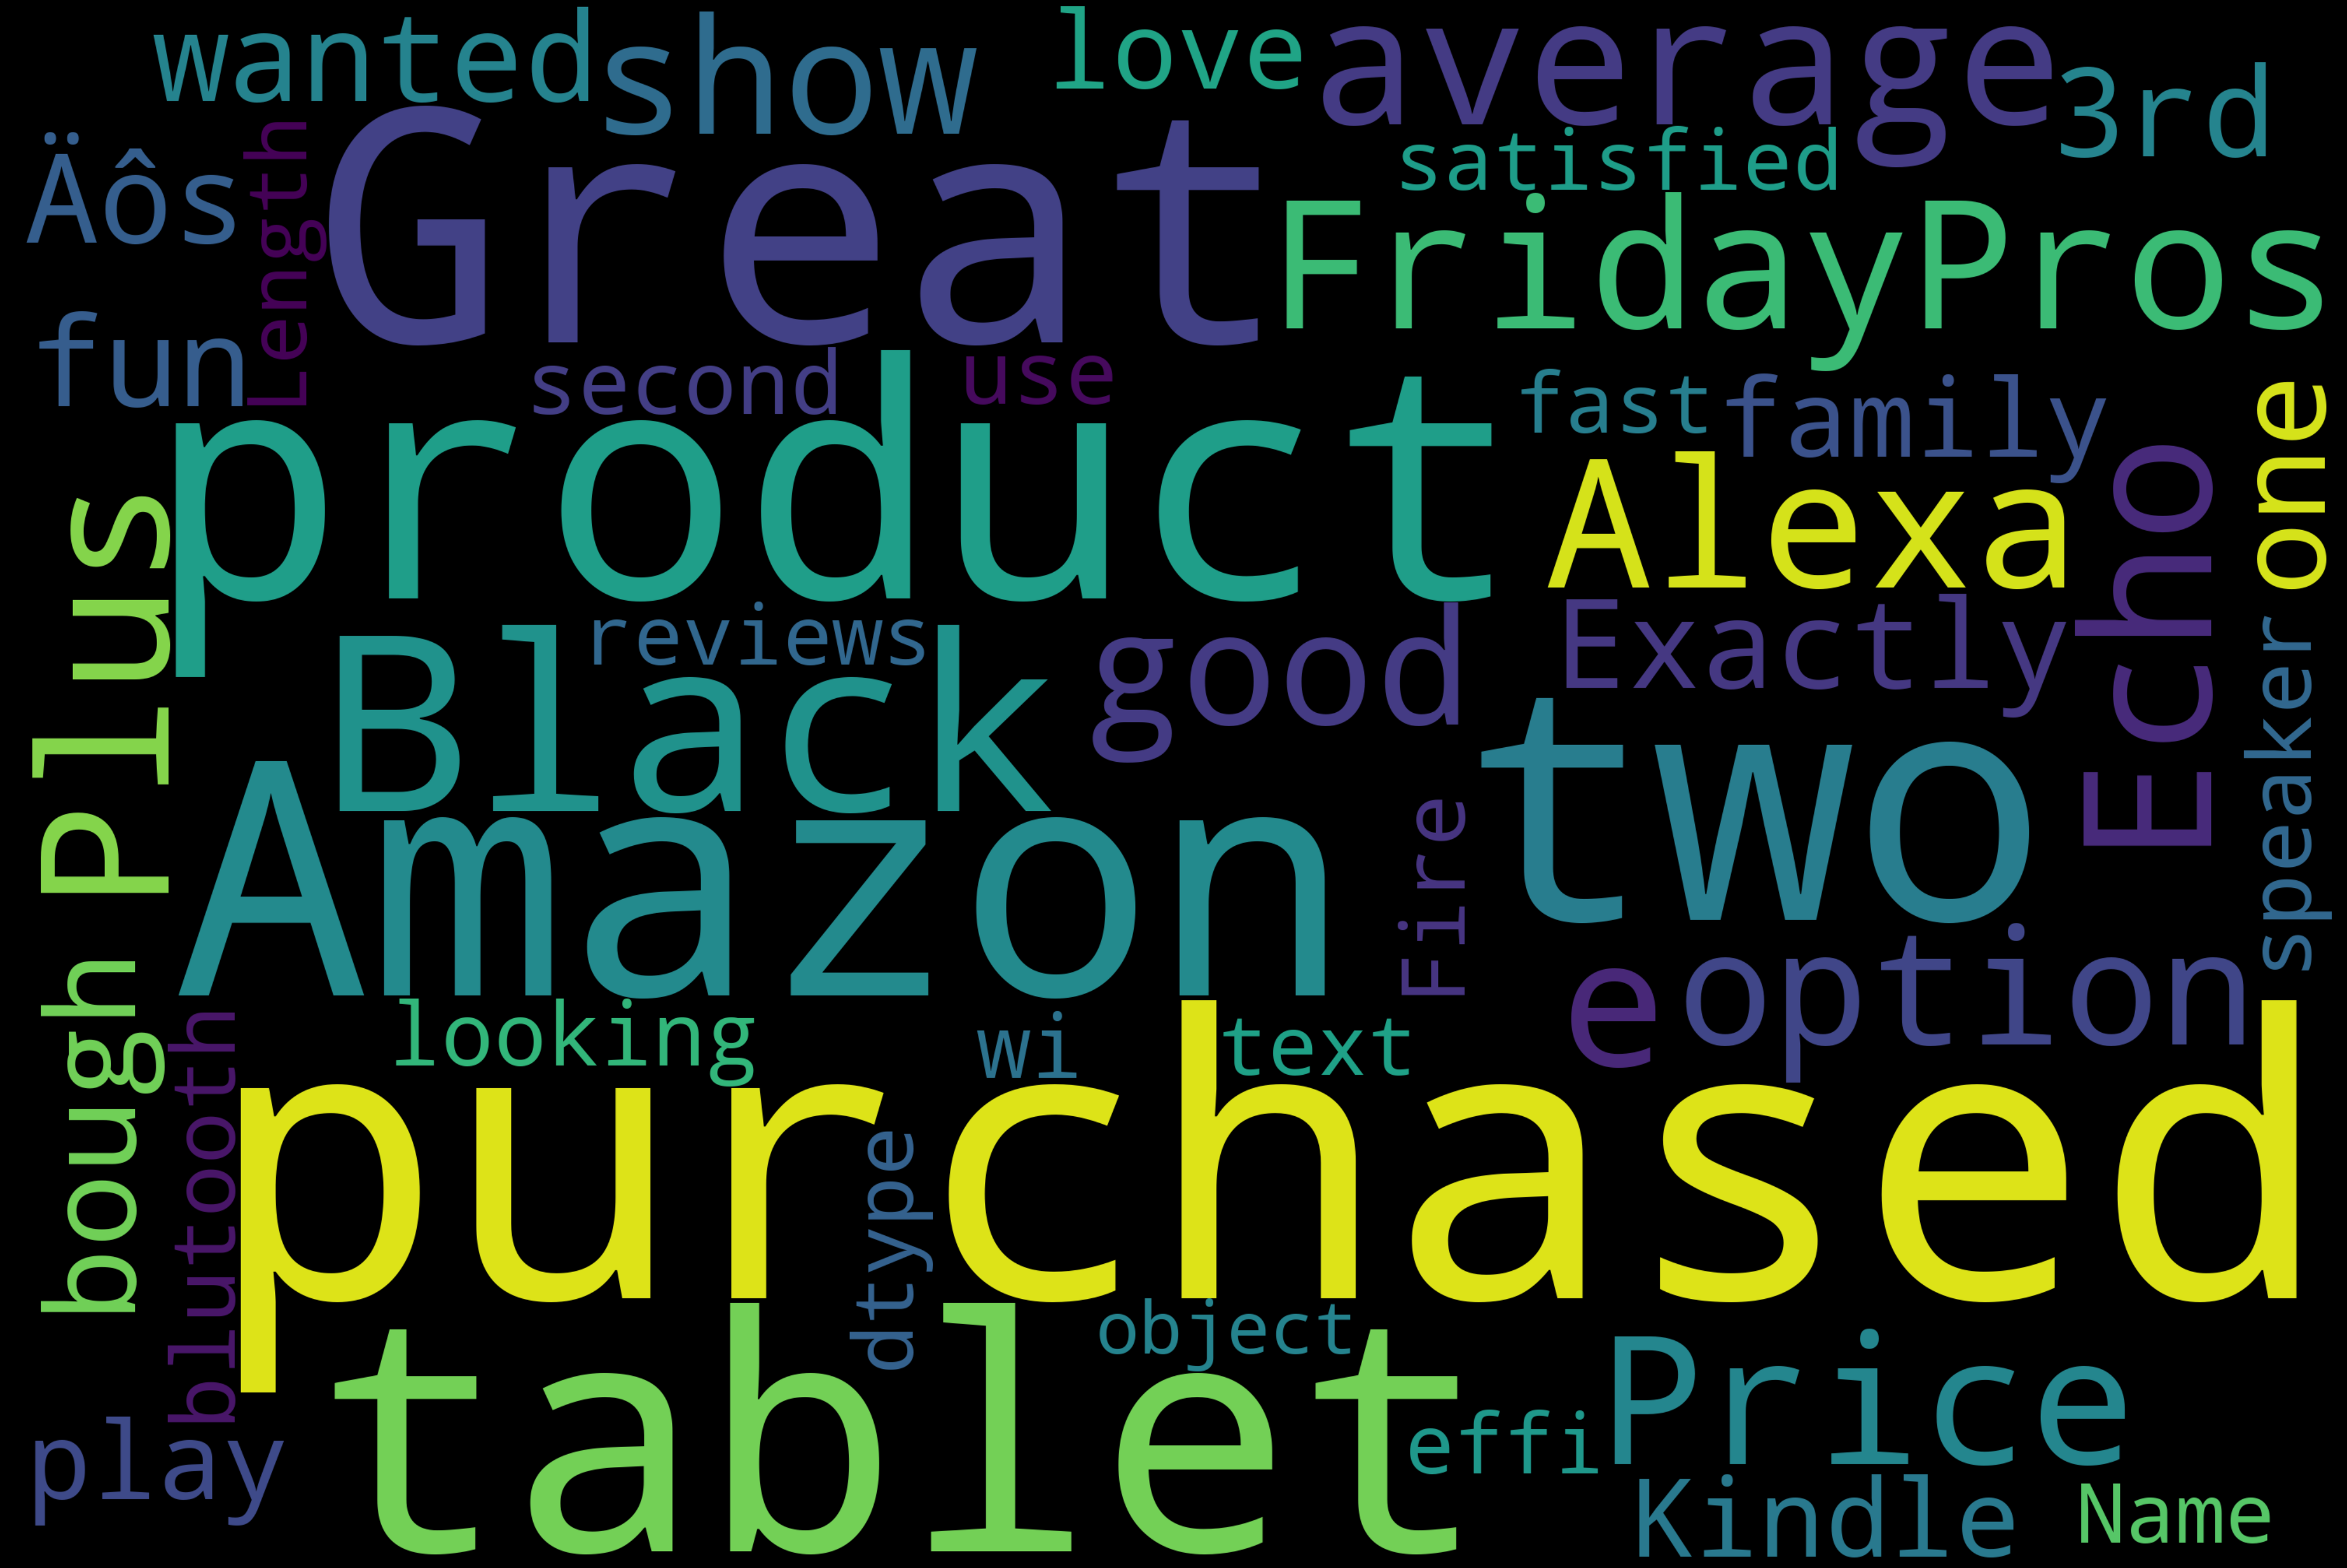

In [15]:
from wordcloud import WordCloud,STOPWORDS

text = df["reviews.text"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.tight_layout(pad=0)
plt.show()

## Wordcloud-Neutral reviews

**Let's look at the word cloud of neutral reviews**

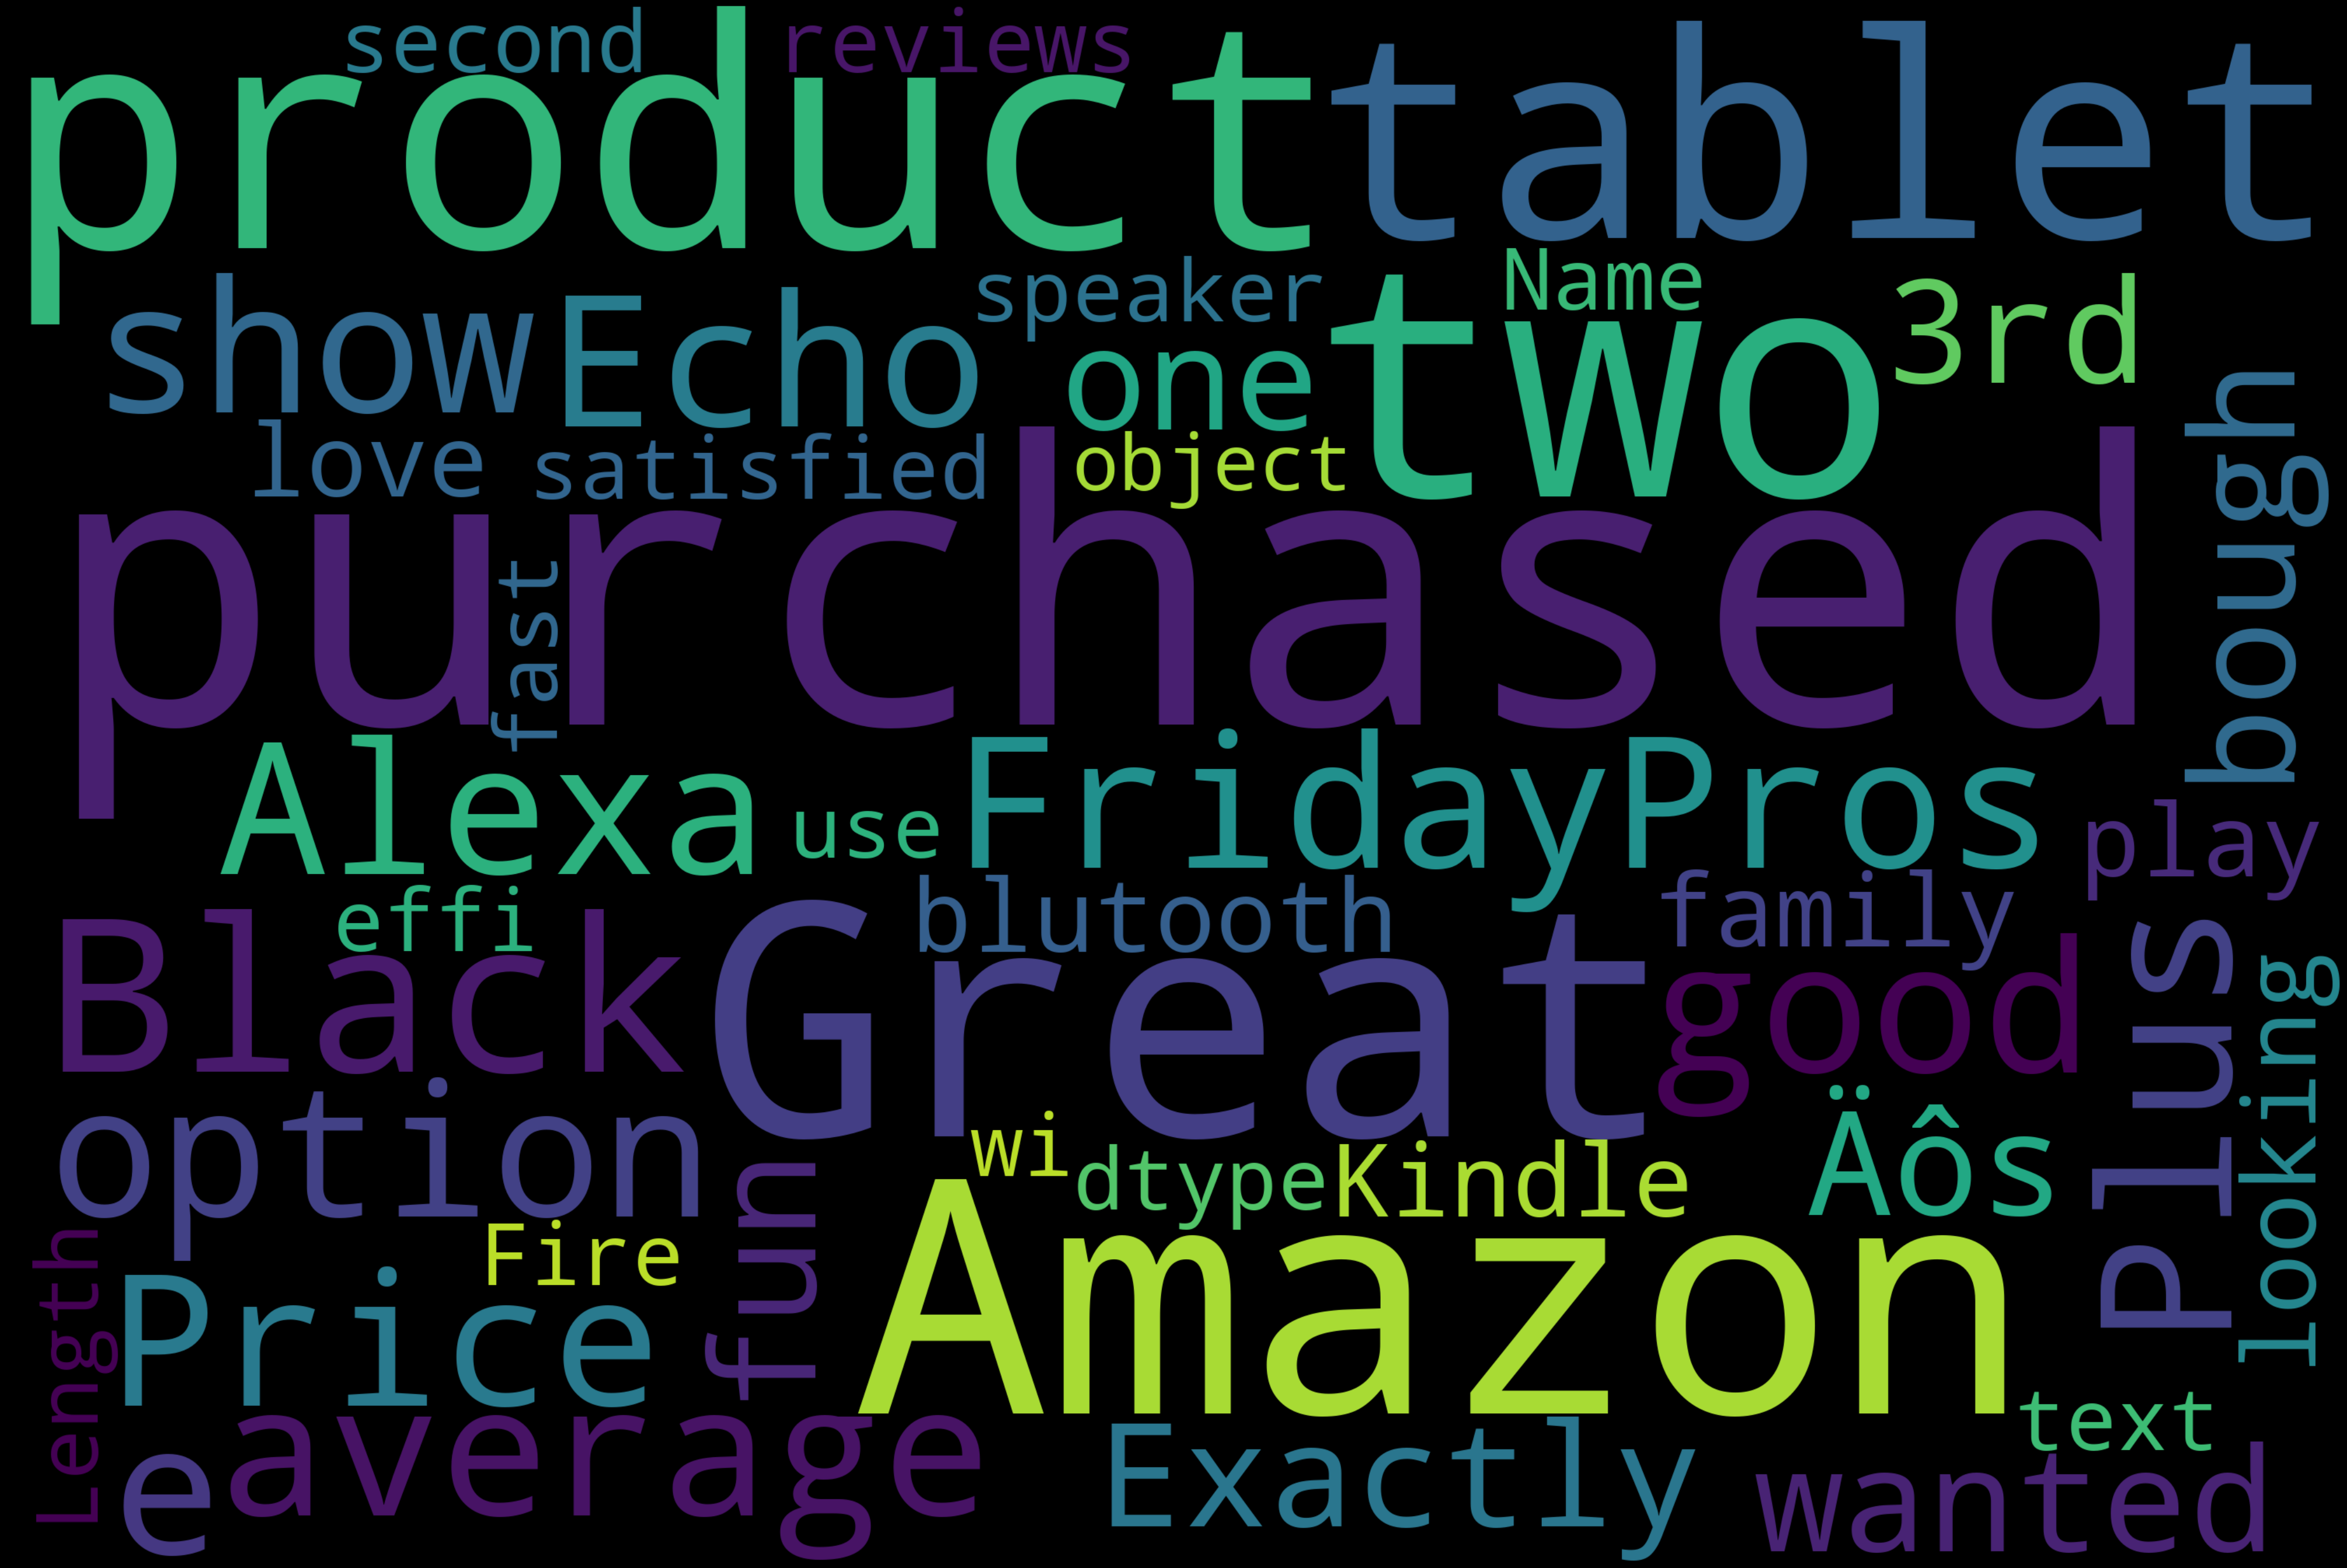

In [16]:
text = df["reviews.text"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.tight_layout(pad=0)
plt.show()

## Wordcloud-Negative reviews

**Let's look at the word cloud of negative reviews**

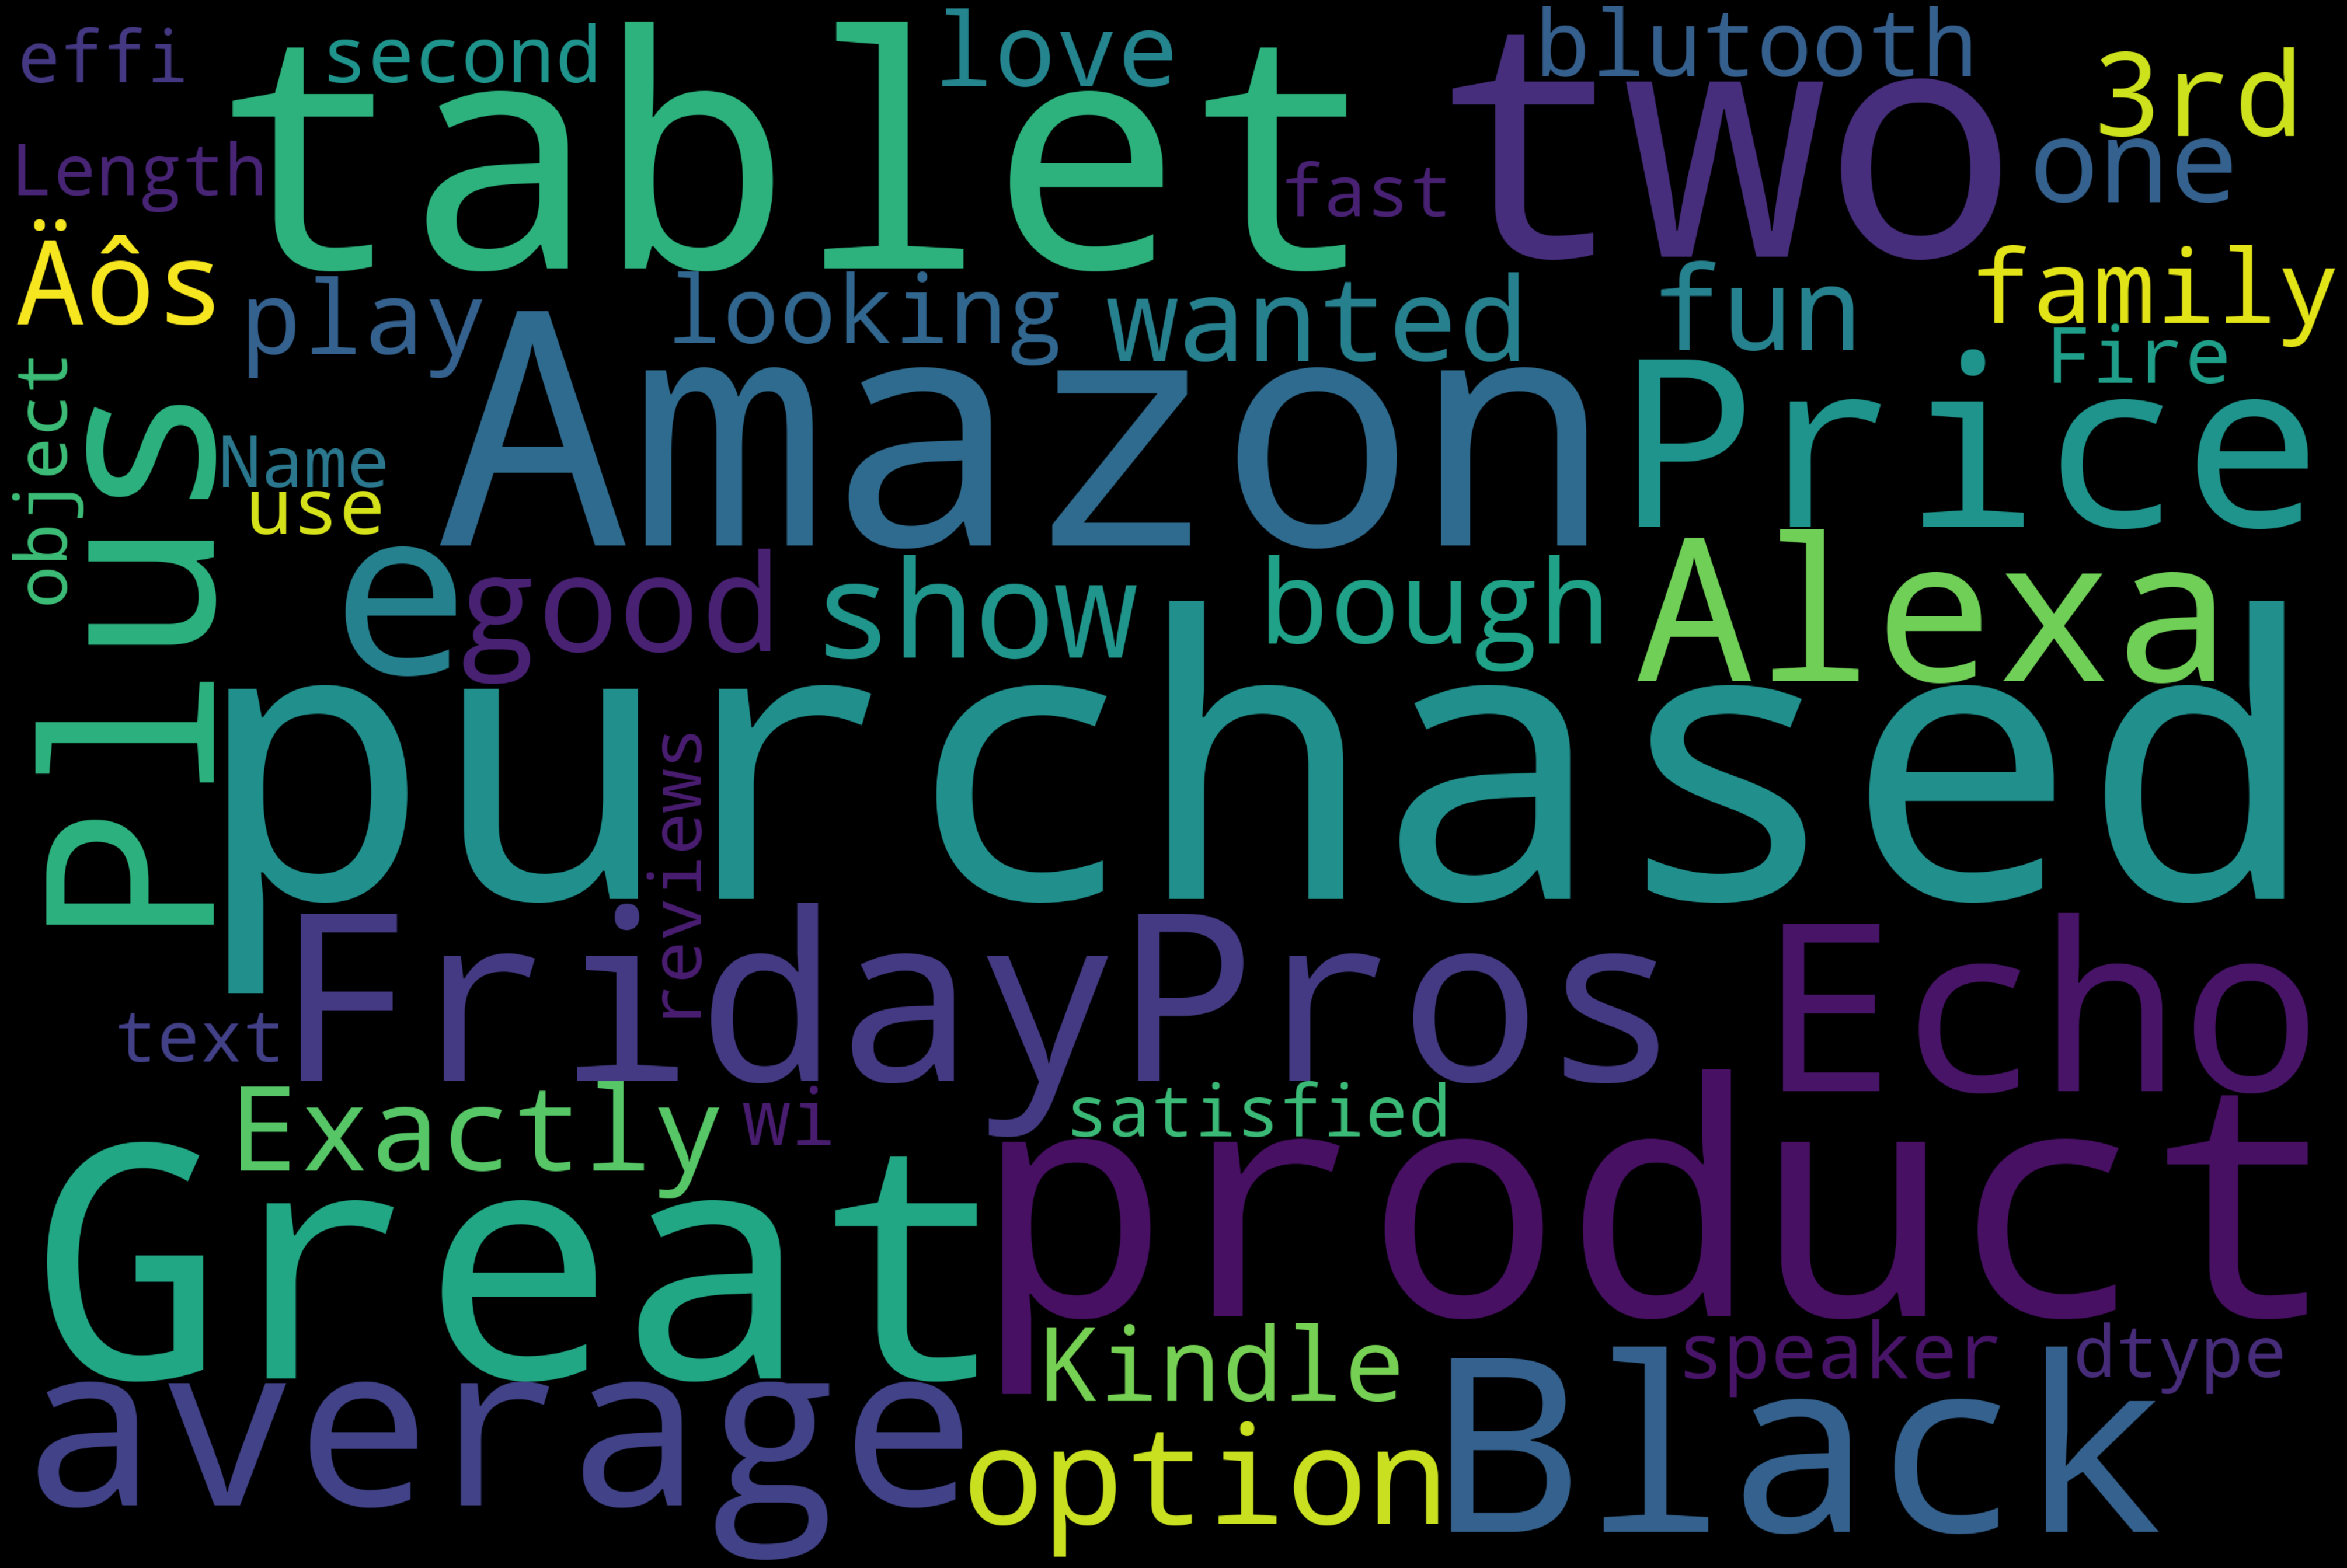

In [17]:
text = df["reviews.text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Extracting Features from Cleaned reviews
**Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation
as computer cannot understand words and their sentiment. 
In this project, we are going to use TF-TDF method to convert the texts**

## Encoding target variable-sentiment
**Let's encode our target variable with Label encoder.**

In [18]:
# calling the label encoder function

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
df['sentiment']= label_encoder.fit_transform(df['sentiment']) 
  
df['sentiment'].unique() 

array([2, 1, 0])

**Feature Engineering**

## TFIDF(Term Frequency — Inverse Document Frequency)
**TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, 
we generally compute a weight to each word which signifies the importance of the word in the document and corpus.
This method is a widely used technique in Information Retrieval and Text Mining.**

**Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the 
top 5000 words from the reviews.**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['reviews.text'])

In [20]:
X.shape

(4000, 5000)

**As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.**

In [21]:
#Getting the target variable(encoded)

y=df['sentiment']

## Train-test split(75:25)
**Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.**

In [22]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Model Building: Sentiment Analysis
**As we have successfully processed the text data, not it is just a normal machine learning problem. 
Where from the sparse matrix we predict the classes in target feature.**

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

**Classifier Selection**


## Model selection

**First select the best peforming model by using cross validaton. Let's consider all the classification algorithm
and perform the model selection process**

In [24]:
#creating the objects

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score


logreg_cv = LogisticRegression(random_state=0)

dt_cv=DecisionTreeClassifier()

knn_cv=KNeighborsClassifier()

svc_cv=SVC()

nb_cv=BernoulliNB()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}

cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.93725
Decision Tree Test Accuracy: 0.9082500000000001
KNN Test Accuracy: 0.9337500000000001
SVC Test Accuracy: 0.9422499999999999
Naive Bayes Test Accuracy: 0.9075000000000001


**From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies
from the results are more than 90%. That's great.So let's go with logistic regression with hyperparameter tuning.**

## Logistic Regression with Hyperparameter tuning
**We use regularization parameter and penality for parameter tuning. let's see which one to plug.**

In [25]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}

clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)

best_model = clf.fit(X_train,y_train)

print(best_model.best_estimator_)

print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=75.43120063354607, random_state=0)
The mean accuracy of the model is: 0.945


In [26]:
logreg = LogisticRegression(C=10000.0, random_state=0)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


**We have got 94% accuracy. That ain't bad. But for classification problems we need to
get confusion matrix and check f1 score rather than accuracy**

## Classification metrics
**Here we plot the confusion matrix with ROC and check our f1 score**

Confusion matrix, without normalization


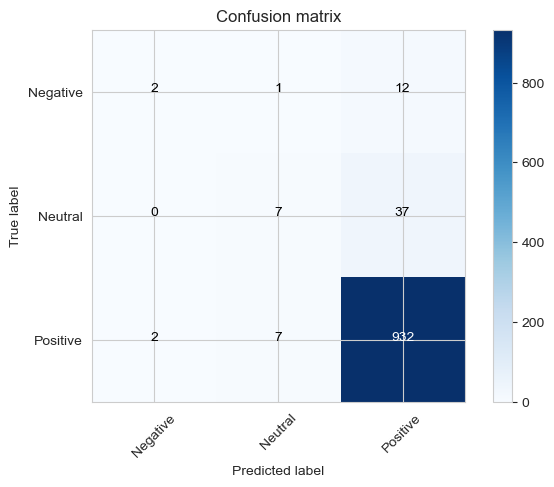

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

**Check out the diagonal elements(932), they are correctly predicted records and rest are incorrectly
classified by the algorithm**

In [28]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.47      0.16      0.24        44
           2       0.95      0.99      0.97       941

    accuracy                           0.94      1000
   macro avg       0.64      0.43      0.47      1000
weighted avg       0.92      0.94      0.93      1000



**Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. 
As we see it got a good score across all classes classified **

** Evaluation Metrics**


## ROC-AUC curve
**This is a very important curve where we decide on which threshold to setup based upon the objective criteria. 
Here we plotted ROC for different classes which can help us understand which class was classified better. 
Also we plot micro and macro averages on the roc curve.**

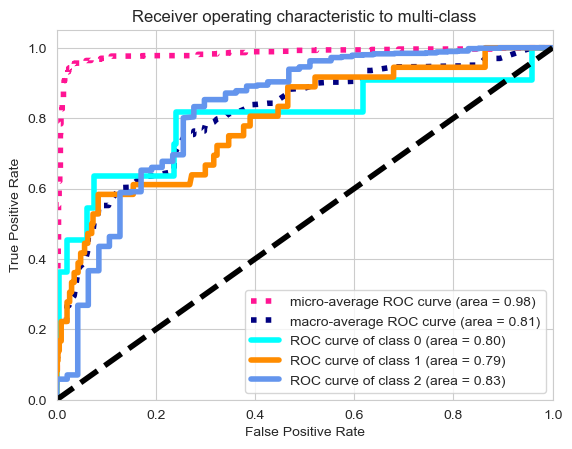

In [29]:
#Binarizing the target feature

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

from sklearn.metrics import roc_curve,auc

from scipy.interpolate import interp1d
from numpy import interp
from itertools import cycle

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr

tpr["macro"] = mean_tpr

roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic to multi-class')

plt.legend(loc="lower right")

plt.show()

**Insights:**
* **Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the 
curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR**
* **Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score**
* **If you don't understand what micro and macro average is, just remember the following 'A macro-average will 
compute the metric independently for each class and then take the average (hence treating all classes equally), whereas 
a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class 
classification setup, micro-average is preferable if you suspect there might be class imbalance'**

# Conclusion

**We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall
score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. 
Here are few insights from the notebook.**

* **Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got 
to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis**
* **Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products**
* **Most of the reviews in this dataset were about string instruments such as guitar.**
* **Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad 
recall and inturn affected my f1 score. So balancing the target feature is important**
* **In sentiment analysis, we should concentrate on our f1 score where we got an average of 94% so we did a pretty good job.**


**Thank you for reading my notebook. You can find my other notebooks** 


**Citations:
    *ChatGpt
    *Google**


# Task 3 and 4

Importing libraries

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

# 1. Preparation
1.1 Reading Data and Handling Missing Values


In [32]:

df = pd.read_csv(r"C:\Users\shita\Downloads\train_data.csv")
df

Name of the product Product Brand  \
0     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1           Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
3     Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4     Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   
...                                                 ...           ...   
3995        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
3996  Amazon Kindle E-Reader 6" Wifi (8th Generation...        Amazon   
3997  Amazon Tap - Alexa-Enabled Portable Bluetooth ...        Amazon   
3998  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   
3999  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   

                                             categories  \
0     Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1     Amazon Echo,Smart Home,Networking,Home & Tools...   
2     Amazon Echo,Virtual Assistant Speakers,Electro...   
3     eBook Readers,Fire Tablets,Electronics Feature...   
4     Computers/Tablets & Networking,Tablets & eBook...   
...                                                 ...   
3995  Amazon Echo,Smart Home,Networking,Home & Tools...   
3996  Computers,Electronics Features,Tablets,Electro...   
3997  Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...   
3998  Computers/Tablets & Networking,Tablets & eBook...   
3999  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                primaryCategories              reviews.date  \
0                     Electronics  2016-12-26T00:00:00.000Z   
1            Electronics,Hardware  2018-01-17T00:00:00.000Z   
2            Electronics,Hardware  2017-12-20T00:00:00.000Z   
3     Office Supplies,Electronics  2017-08-04T00:00:00.000Z   
4                     Electronics  2017-01-23T00:00:00.000Z   
...                           ...                       ...   
3995         Electronics,Hardware  2017-12-08T00:00:00.000Z   
3996                  Electronics  2017-03-31T00:00:00.000Z   
3997                  Electronics  2017-01-19T00:00:00.000Z   
3998                  Electronics  2016-05-27T00:00:00.000Z   
3999                  Electronics  2016-12-30T00:00:00.000Z   

                                           reviews.text  \
0     Purchased on Black FridayPros - Great Price (e...   
1     I purchased two Amazon in Echo Plus and two do...   
2     Just an average Alexa option. Does show a few ...   
3     very good product. Exactly what I wanted, and ...   
4     This is the 3rd one I've purchased. I've bough...   
...                                                 ...   
3995  It‚Äôs fun for the family to play with, but it...   
3996  I love the Kindle, it is a great product. It r...   
3997  I was looking for a blutooth speaker to use wi...   
3998  This is the second Amazon Fire 7 tablet I have...   
3999  very satisfied with tablet, very fast and effi...   

                               reviews.title sentiment  
0                            Powerful tablet  Positive  
1                   Amazon Echo Plus AWESOME  Positive  
2                                    Average   Neutral  
3                                Greattttttt  Positive  
4                              Very durable!  Positive  
...                                      ...       ...  
3995                                 Fun toy  Positive  
3996                           Great Product  Positive  
3997                    Great "dumb" speaker  Positive  
3998  A great 7 inch tablet at a great price  Positive  
3999                       Gets the job done  Positive  

[4000 rows x 8 columns]

In [33]:
print("The shape of the training data is :",df.shape)
df.head()

The shape of the training data is : (4000, 8)


Name of the product Product Brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z   
4                  Electronics  2017-01-23T00:00:00.000Z   

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title sentiment  
0           Powerful tablet  Positive  
1  Amazon Echo Plus AWESOME  Positive  
2                   Average   Neutral  
3               Greattttttt  Positive  
4             Very durable!  Positive

# Finding Null Values


In [34]:
df.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64

In [35]:
df.dtypes

Name of the product    object
Product Brand          object
categories             object
primaryCategories      object
reviews.date           object
reviews.text           object
reviews.title          object
sentiment              object
dtype: object

In [36]:
df.describe()

Name of the product Product Brand  \
count                                                4000          4000   
unique                                                 23             1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
freq                                                  676          4000   

                                               categories primaryCategories  \
count                                                4000              4000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  628              2600   

                    reviews.date  \
count                       4000   
unique                       638   
top     2017-01-23T00:00:00.000Z   
freq                          99   

                                             reviews.text reviews.title  \
count                                                4000          3990   
unique                                               3598          2606   
top     I bought this kindle for my 11yr old granddaug...  Great tablet   
freq                                                    4           100   

       sentiment  
count       4000  
unique         3  
top     Positive  
freq        3749

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [38]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [39]:
# columns for each data

print(f'\t Data columns \n{list(df.columns)}\n')


	 Data columns 
['Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title', 'sentiment']



In [40]:
# shape for each data

print(f'\t Data shape: {df.shape}\n')


	 Data shape: (4000, 8)



In [41]:
# how many missing values exist or better still what is the % of missing values in the dataset?

def percent_missing(df, data_type):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(f"The {data_type} dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df, 'data')


The data dataset contains 0.03 % missing values.


In [42]:
df['reviews.title']=df['reviews.title'].fillna('Missing')

In [43]:
df.isnull().sum()

Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64

In [44]:
#Figuring out the distribution of categories
df['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title sentiment  
0           Powerful tablet  Positive  
1  Amazon Echo Plus AWESOME  Positive  
2                   Average   Neutral  
3               Greattttttt  Positive  
4             Very durable!  Positive  


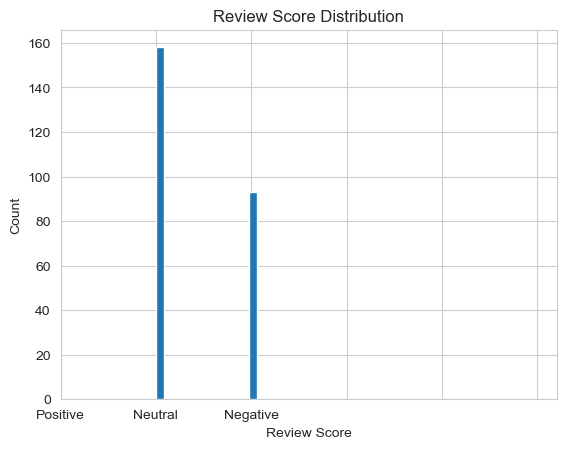

In [45]:
#Extract subset of data which we'll be working on
data = df[['reviews.text', 'reviews.title', 'sentiment']]
print(data.head())

#Observe that review score distribution is highly skewed towards 5 stars, having the highest count
plt.title('Review Score Distribution')

#Create histogram to show distribution of star ratings in reviews
bins = np.linspace(1, 5)

plt.hist(df['sentiment'], bins)
plt.xticks(np.arange(0, 6, 1))

plt.xlabel('Review Score')
plt.ylabel('Count')

plt.show()

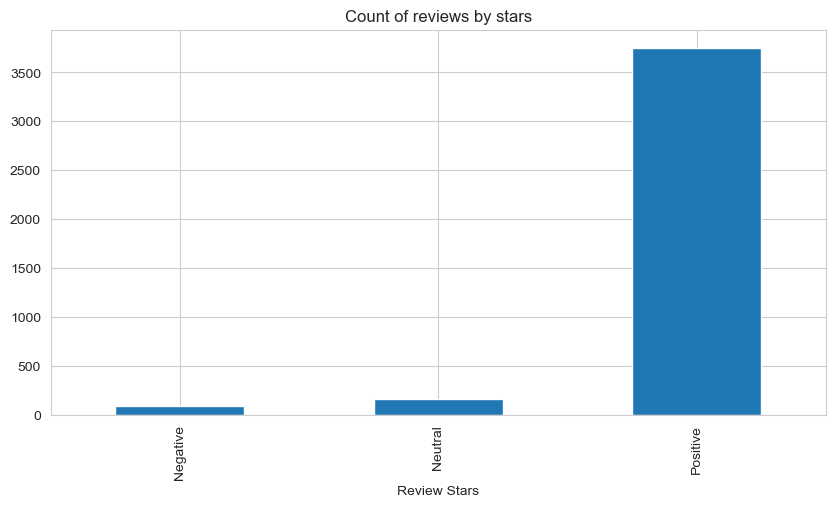

In [46]:
ax=df['sentiment'].value_counts().sort_index().plot(kind='bar', 
                                                title='Count of reviews by stars', 
                                                figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

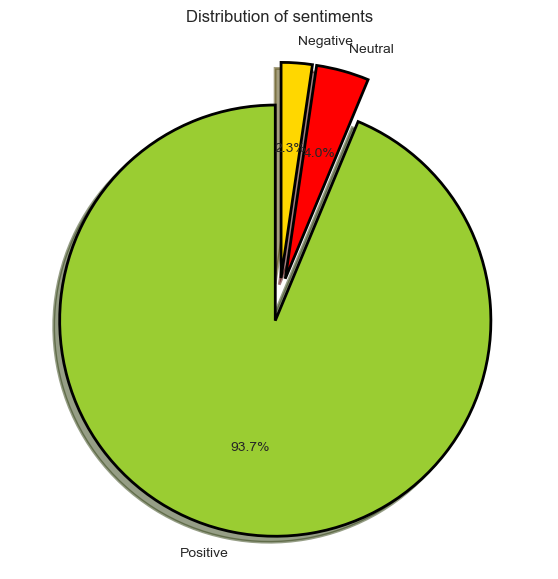

In [47]:
fig = plt.figure(figsize=(7,7))

colors = ('yellowgreen','red','gold')

wp = {'linewidth':2, 'edgecolor':'black'}

tags = df['sentiment'].value_counts()

explode = (0.1,0.1,0.1)

tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
          
         startangle=90,wedgeprops=wp,explode=explode,label='')

plt.title('Distribution of sentiments')

1.3 Data Preparation and Cleaning

In [48]:
#Combine summary and review text into the same text line
df['text'] = df[['reviews.title', 'reviews.text']].apply(' '.join, axis=1)

#Drop summary and original text 
df.drop(['reviews.title', 'reviews.text'], axis=1, inplace=True)

df.head()

Name of the product Product Brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date sentiment  \
0                  Electronics  2016-12-26T00:00:00.000Z  Positive   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z  Positive   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   Neutral   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z  Positive   
4                  Electronics  2017-01-23T00:00:00.000Z  Positive   

                                                text  
0  Powerful tablet Purchased on Black FridayPros ...  
1  Amazon Echo Plus AWESOME I purchased two Amazo...  
2  Average Just an average Alexa option. Does sho...  
3  Greattttttt very good product. Exactly what I ...  
4  Very durable! This is the 3rd one I've purchas...

In [49]:
pos_comments = df[df.sentiment == 'Positive']
pos_comments.head()

Name of the product Product Brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   
5  Kindle E-reader - White, 6 Glare-Free Touchscr...        Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   
5  Office,eBook Readers,Electronics Features,Walm...   

             primaryCategories              reviews.date sentiment  \
0                  Electronics  2016-12-26T00:00:00.000Z  Positive   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z  Positive   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z  Positive   
4                  Electronics  2017-01-23T00:00:00.000Z  Positive   
5  Office Supplies,Electronics  2016-12-23T00:00:00.000Z  Positive   

                                                text  
0  Powerful tablet Purchased on Black FridayPros ...  
1  Amazon Echo Plus AWESOME I purchased two Amazo...  
3  Greattttttt very good product. Exactly what I ...  
4  Very durable! This is the 3rd one I've purchas...  
5  You will love it This is a great product. Ligh...

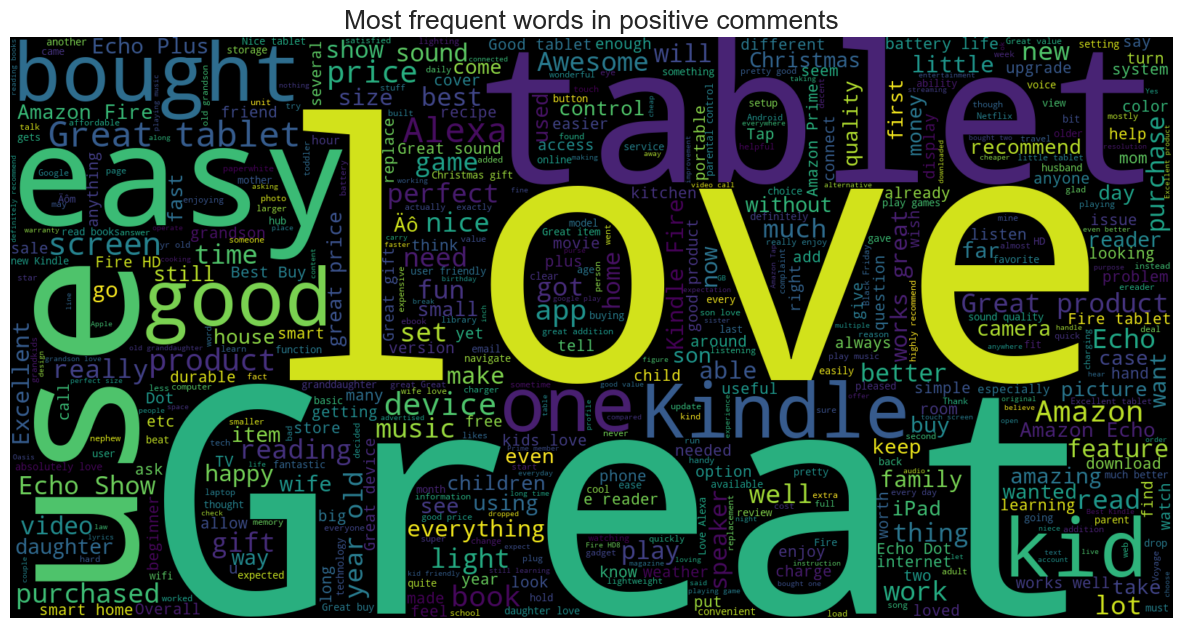

In [50]:
text = ' '.join([word for word in pos_comments['text']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [51]:
neg_comments = df[df.sentiment == 'Negative']
neg_comments.head()

Name of the product Product Brand  \
9    All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
97   Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
104  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   
121  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...        Amazon   
150  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   

                                            categories  \
9    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
97   Computers,Amazon Echo,Virtual Assistant Speake...   
104  Computers/Tablets & Networking,Tablets & eBook...   
121  Fire Tablets,Tablets,All Tablets,Amazon Tablet...   
150  eBook Readers,Fire Tablets,Electronics Feature...   

               primaryCategories              reviews.date sentiment  \
9                    Electronics  2017-05-18T00:00:00.000Z  Negative   
97          Electronics,Hardware  2017-12-25T00:00:00.000Z  Negative   
104                  Electronics  2017-01-01T00:00:00.000Z  Negative   
121                  Electronics  2016-10-02T00:00:00.000Z  Negative   
150  Office Supplies,Electronics  2016-11-29T00:00:00.000Z  Negative   

                                                  text  
9    was cheap, can not run chrome stuff, returned ...  
97   Useless screen so why pay for it? Worthless, e...  
104  Amazon Fire 7 Tablet Too bad Amazon turned thi...  
121  Kid's Kindle I bought this Kindle for my 7 yea...  
150  Have never purchased a more frustrating Device...

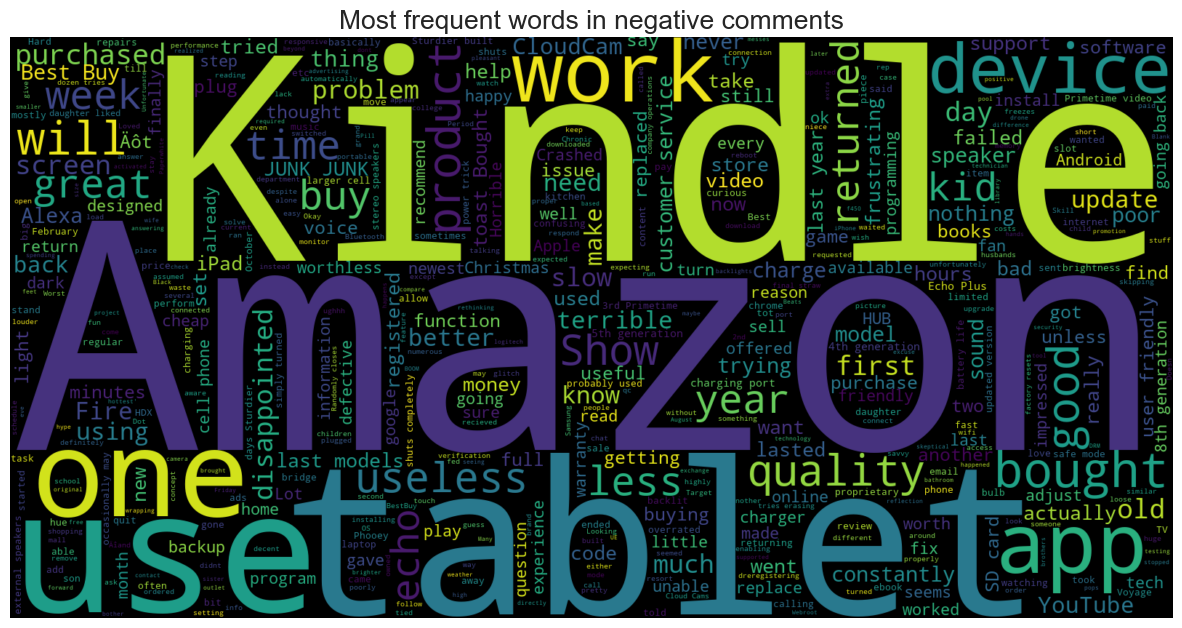

In [52]:
text = ' '.join([word for word in neg_comments['text']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

In [53]:
neu_comments = df[df.sentiment == 'Neutral']
neu_comments.head()

Name of the product Product Brand  \
2   Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
6   Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   
17  Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...        Amazon   
59  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...        Amazon   
95  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   

                                           categories     primaryCategories  \
2   Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
6   Computers/Tablets & Networking,Tablets & eBook...           Electronics   
17  Fire Tablets,Computers/Tablets & Networking,Ta...           Electronics   
59  Fire Tablets,Tablets,All Tablets,Amazon Tablet...           Electronics   
95  Electronics,iPad & Tablets,All Tablets,Fire Ta...           Electronics   

                reviews.date sentiment  \
2   2017-12-20T00:00:00.000Z   Neutral   
6   2017-05-31T00:00:00.000Z   Neutral   
17  2017-04-12T00:00:00.000Z   Neutral   
59  2017-04-22T00:00:00.000Z   Neutral   
95  2017-01-06T00:00:00.000Z   Neutral   

                                                 text  
2   Average Just an average Alexa option. Does sho...  
6   OK For Entry Level Tablet My 7-year old daught...  
17  Not as good as before Not as good as before th...  
59  Does what it says, missing one key feature The...  
95  Haven't set it up yet It's unfair for me to ra...

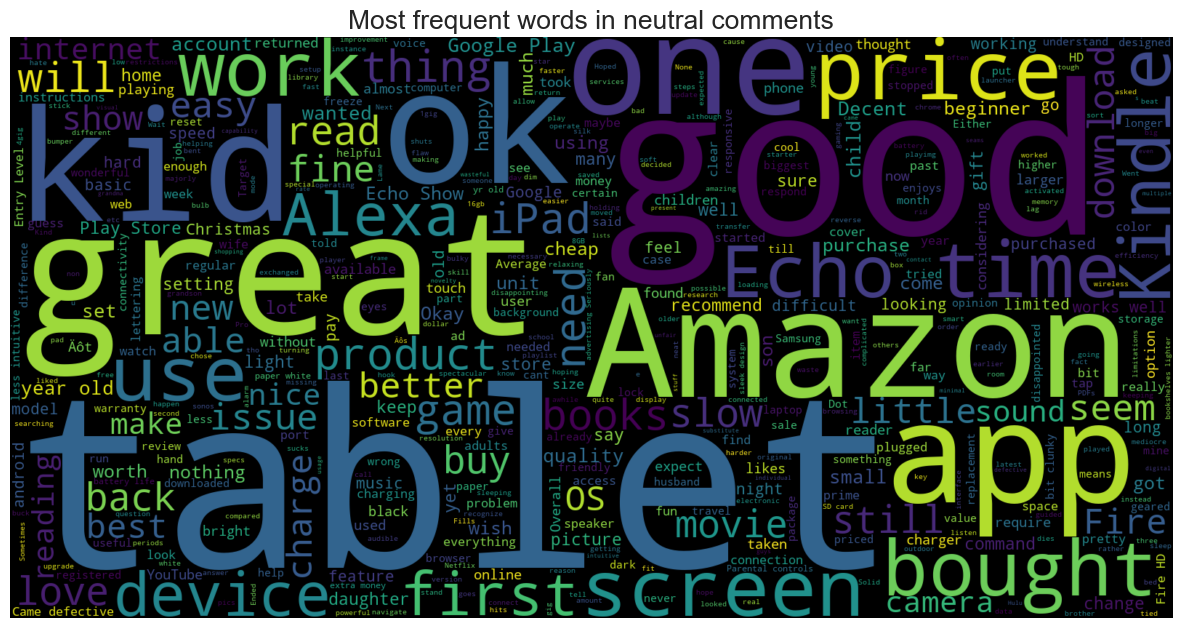

In [54]:
text = ' '.join([word for word in neu_comments['text']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

# 3. Feature Engineering
Exploring the possiblity of creating an additional feature for the machine learning model.
A possible feature could be length of review.
But there is no strong correlation found between length of review to positive/negative sentiment.

sentiment
Negative    230.677419
Neutral     171.348101
Positive    142.998400
Name: text_len, dtype: float64


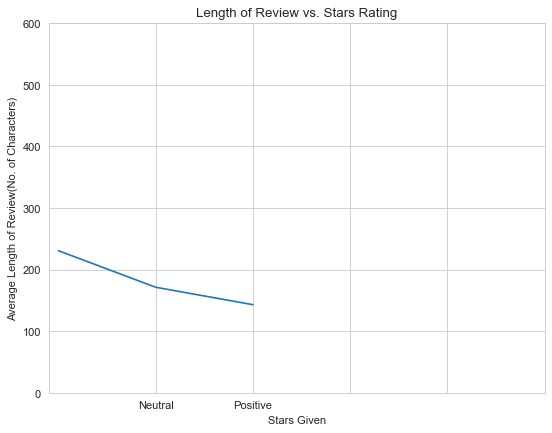

In [55]:
#Calculate review length minus whitespaces
df['text_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
average_rating = df.groupby('sentiment')['text_len'].mean()
print(average_rating)

#Create line plot of review length with respect to stars rating
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(average_rating)
plt.xticks(np.arange(1, 6, 1))
plt.title('Length of Review vs. Stars Rating')
plt.ylim([0, 600])
plt.xlabel('Stars Given')
plt.ylabel('Average Length of Review(No. of Characters)')
plt.show()

# 4. Machine Learning
4.1 Balancing the Datasets for Positive and Negative Sentiment

Since there is significantly more positive reviews than negative reviews, balancing the number of positive reviews to match the number of negative reviews is necessary.


Converting text into Vectors TF-IDF calculates that how relevant a word in a series or corpus is to a text. 

The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word 
frequency in the corpus (data-set). We will be implementing this with the code below.

In [56]:
df.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'sentiment', 'text', 'text_len'],
      dtype='object')

In [58]:
pip install example_module

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Assuming you've initialized and fitted your vectorizer
vect = TfidfVectorizer()
vect.fit(df['text'])  # Assuming 'text' is a column in your DataFrame 'df'

# Now you can transform your text data using the fitted vectorizer
X = df['text']
Y = df['sentiment']
X = vect.transform(X)

Model training, Evaluation, and Prediction Once analysis and vectorization is done. We can now explore any machine
learning model to train the data. But before that perform the train-test split.

In [61]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test=train_test_split(X,Y,
                                                test_size=0.25 ,
                                                random_state=42)

In [62]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3000, 5050)
Size of y_train: (3000,)
Size of x_test: (1000, 5050)
Size of y_test: (1000,)


In [63]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

 
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print('Test accuracy:', accuracy_score(y_test,pred))

Test accuracy: 0.937


In [64]:
cm = metrics.confusion_matrix(y_test, pred)

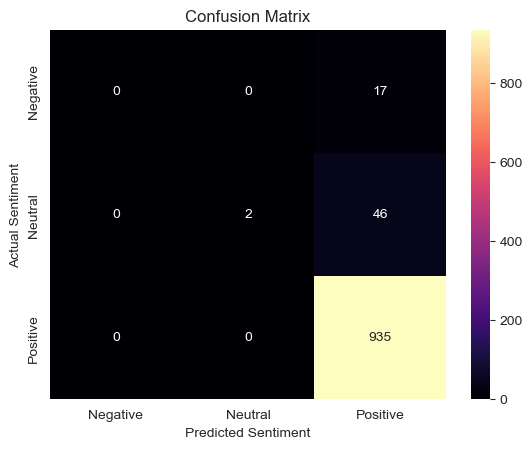

In [65]:
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()


In [66]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

param_grid = {'C':[0.001,0.01,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [67]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'C': 10}


In [68]:
y_pred = grid.predict(x_test)

In [69]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.10%


In [70]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[  9   1   7]
 [  0   8  40]
 [  0   1 934]]


              precision    recall  f1-score   support

    Negative       1.00      0.53      0.69        17
     Neutral       0.80      0.17      0.28        48
    Positive       0.95      1.00      0.97       935

    accuracy                           0.95      1000
   macro avg       0.92      0.57      0.65      1000
weighted avg       0.95      0.95      0.94      1000



In [71]:
from sklearn.svm import LinearSVC


SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [72]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 95.10%


In [73]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[  9   0   8]
 [  0   8  40]
 [  0   1 934]]


              precision    recall  f1-score   support

    Negative       1.00      0.53      0.69        17
     Neutral       0.89      0.17      0.28        48
    Positive       0.95      1.00      0.97       935

    accuracy                           0.95      1000
   macro avg       0.95      0.57      0.65      1000
weighted avg       0.95      0.95      0.94      1000



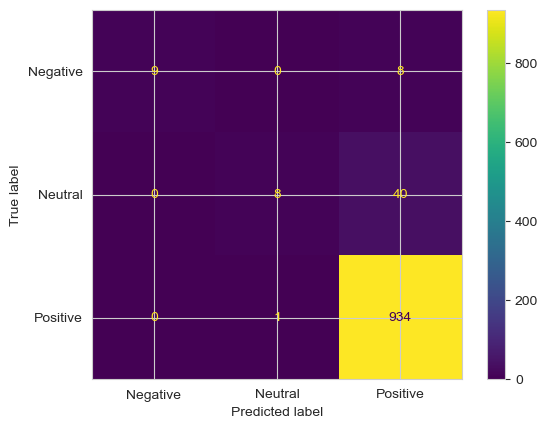

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()

In [75]:
sentiment_label = df.sentiment.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 Index(['Positive', 'Neutral', 'Negative'], dtype='object'))

In [76]:
tweet = df.text.values

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [78]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [79]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

# LSTM Implementation

Build the Text Classifier

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
vocab_size = 10000 
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 336651 (1.28 MB)
Trainable params: 336651 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Train the sentiment analysis model

In [81]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5


100/100 [==============================] - 15s 112ms/step - loss: 0.3499 - accuracy: 0.9319 - val_loss: 0.2866 - val_accuracy: 0.9400
Epoch 2/5
100/100 [==============================] - 10s 104ms/step - loss: 0.2890 - accuracy: 0.9366 - val_loss: 0.2723 - val_accuracy: 0.9400
Epoch 3/5
100/100 [==============================] - 10s 101ms/step - loss: 0.2078 - accuracy: 0.9378 - val_loss: 0.2093 - val_accuracy: 0.9400
Epoch 4/5
100/100 [==============================] - 11s 108ms/step - loss: 0.1036 - accuracy: 0.9434 - val_loss: 0.1971 - val_accuracy: 0.9187
Epoch 5/5
100/100 [==============================] - 12s 115ms/step - loss: 0.0508 - accuracy: 0.9450 - val_loss: 0.1998 - val_accuracy: 0.9237


The python sentiment analysis model obtained 94% accuracy on the training set and 93% accuracy on the test set.



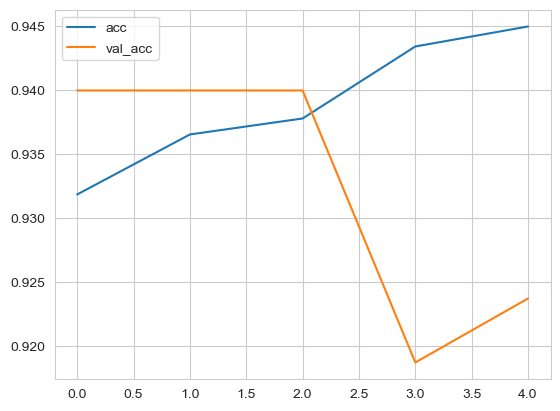

<Figure size 640x480 with 0 Axes>

In [82]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

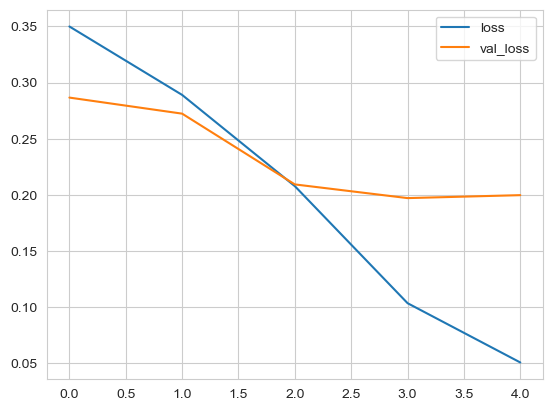

<Figure size 640x480 with 0 Axes>

In [83]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

Let’s execute sentiment analysis model

Define a function that takes a text as input and outputs its prediction label.

In [84]:
df.text

0       Powerful tablet Purchased on Black FridayPros ...
1       Amazon Echo Plus AWESOME I purchased two Amazo...
2       Average Just an average Alexa option. Does sho...
3       Greattttttt very good product. Exactly what I ...
4       Very durable! This is the 3rd one I've purchas...
                              ...                        
3995    Fun toy It‚Äôs fun for the family to play with...
3996    Great Product I love the Kindle, it is a great...
3997    Great "dumb" speaker I was looking for a bluto...
3998    A great 7 inch tablet at a great price This is...
3999    Gets the job done very satisfied with tablet, ...
Name: text, Length: 4000, dtype: object

In [85]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "Powerful tablet Purchased on Black FridayPros."
predict_sentiment(test_sentence1)

test_sentence2 = "A great 7 inch tablet at a great price This is"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 474ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 52ms/step
Predicted label:  Positive


Conclusion We have done a pretty neat job on classifying all the classes starting from splitting the sentiments
based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling 
imbalance with smote. Here are few insights from the notebook.

Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be 
manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis Most of
our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give
them to the seller to help them improve their products Most of the reviews in this dataset were about string instruments
such as guitar. Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but
very bad recall and inturn affected my f1 score. So balancing the target feature is important In sentiment analysis,
we should concentrate on our f1 score where we got an average of 94% so we did a pretty good job. Thank you for reading
my notebook. You can find my other notebooks

**Citations: ChatGpt Google

# Thank You